In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

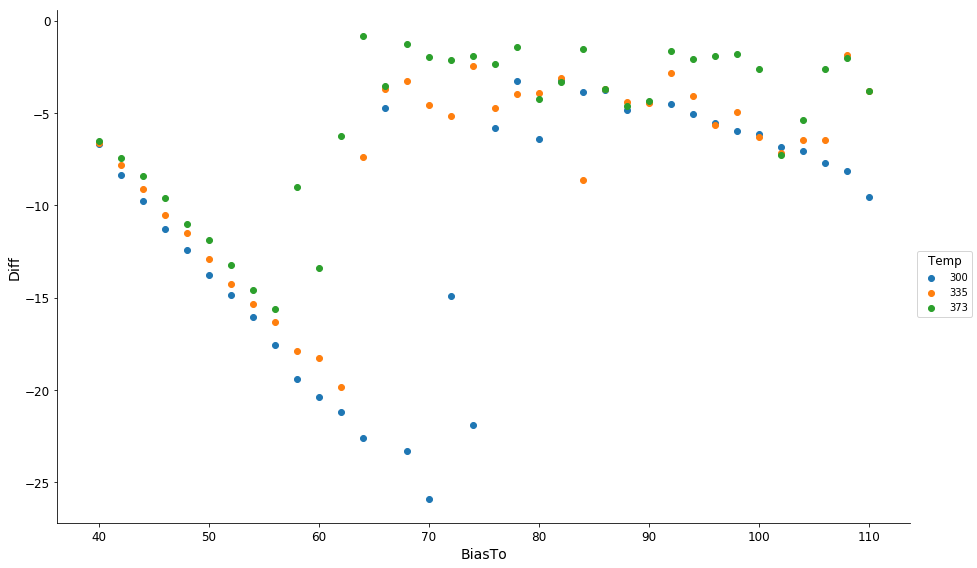

In [10]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second/rerun_7_19_May_155517.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun7 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [18]:
rerun7 = pd.read_feather("/Users/weilu/Research/server/may_2018/second/rerun_7_19_May_155517.feather")
rerun6 = pd.read_feather("/Users/weilu/Research/server/may_2018/second/rerun_6_19_May_155517.feather")
data = pd.concat([rerun6, rerun7])
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
data["TempT"] = data["Temp"].apply(lambda x: dic[x])
chosen = data.query("TempT < 420")
chosen.reset_index().to_feather("/Users/weilu/Research/server/may_2018/03_week/all_data_folder/second_may19.feather")

In [19]:
data

Step  Run Temp        Qw      Energy     DisReal    Dis_h56  \
0        60004000    0   T2  0.361442 -692.687622   77.046868  26.215912   
1        60004000    1   T7  0.084696  117.428716   75.793012  28.910414   
2        60004000    2   T1  0.345007 -808.102116   78.914281  27.413183   
3        60004000    3  T11  0.070248  868.525511   73.251730  54.713257   
4        60004000    4   T4  0.104841 -431.602509   70.760834  42.980847   
5        60004000    5   T6  0.096252 -118.778565   80.264645  41.543846   
6        60004000    6   T3  0.177222 -611.269735   69.673122  43.789774   
7        60004000    7   T9  0.079159  502.719430   90.542442  48.972493   
8        60004000    8   T8  0.066973  429.184717   72.528998  42.565286   
9        60004000    9   T5  0.090009 -306.460609   77.083008  46.870793   
10       60004000   10  T10  0.073574  755.334685   88.453311  60.058718   
11       60004000   11   T0  0.365321 -816.634353   81.426887  27.290382   
12       60008000    0   T2  0.392508 -698.237107   84.641804  28.340007   
13       60008000    1   T7  0.086099   75.709629   87.972307  41.536431   
14       60008000    2   T1  0.358961 -783.079676   76.058530  27.347157   
15       60008000    3  T11  0.064233  910.225969   85.128056  65.955566   
16       60008000    4   T4  0.110923 -438.541180   78.469364  36.483444   
17       60008000    5   T6  0.094366 -121.277682   91.558756  54.153788   
18       60008000    6   T3  0.161803 -595.417788   78.434112  43.968265   
19       60008000    7   T9  0.079984  540.304420   82.203929  55.953212   
20       60008000    8   T8  0.067585  402.713559   88.759034  58.706206   
21       60008000    9   T5  0.089791 -378.660101   87.684704  48.207171   
22       60008000   10  T10  0.074861  728.117501   88.673185  69.856524   
23       60008000   11   T0  0.389072 -854.854605   75.671675  25.811388   
24       60012000    0   T2  0.342908 -749.615666   74.876910  25.385569   
25       60012000    1   T7  0.086520   95.040425   77.777553  48.697574   
26       60012000    2   T1  0.363259 -804.228194   79.944041  23.494465   
27       60012000    3  T11  0.062706  909.620710   83.019558  67.726559   
28       60012000    4   T4  0.120265 -501.989050   80.232044  31.816246   
29       60012000    5   T6  0.097948  -78.122309   80.402859  52.571337   
...           ...  ...  ...       ...         ...         ...        ...   
1079970  79992000    6   T4  0.100194 -471.501109  110.106716  32.042169   
1079971  79992000    7   T0  0.343627 -890.654006  100.278070  22.059778   
1079972  79992000    8  T11  0.056088  855.458972  102.219960  31.301283   
1079973  79992000    9   T7  0.073067   94.643470  110.030418  41.832058   
1079974  79992000   10   T5  0.089354 -280.064429  105.716751  12.180958   
1079975  79992000   11   T8  0.068158  414.943697   98.232736  38.944204   
1079976  79996000    0   T2  0.347575 -749.949139   96.031979  26.280834   
1079977  79996000    1   T9  0.060220  498.747140  104.776851  51.632260   
1079978  79996000    2   T1  0.379351 -801.878348   89.352130  26.501929   
1079979  79996000    3   T3  0.106617 -553.126973  104.293977  19.361344   
1079980  79996000    4   T6  0.075760 -141.767779   95.572511  26.783630   
1079981  79996000    5  T10  0.062003  718.436371   94.355536  34.956967   
1079982  79996000    6   T4  0.100072 -414.074015  111.614127  25.288909   
1079983  79996000    7   T0  0.395375 -870.676086   91.820353  25.529091   
1079984  79996000    8  T11  0.074209  872.899565  105.144205  23.427566   
1079985  79996000    9   T7  0.070345  145.582156  103.360813  50.188944   
1079986  79996000   10   T5  0.090998 -337.824355  112.057049  18.250734   
1079987  79996000   11   T8  0.061809  322.397080  102.886157  54.721405   
1079988  80000000    0   T2  0.326529 -732.767353   87.471225  25.817823   
1079989  80000000    1   T9  0.058525  577.777033   87.258113  53.967260   
1079990  80000000    2   T1  0.388617 -800.153161   87.966854

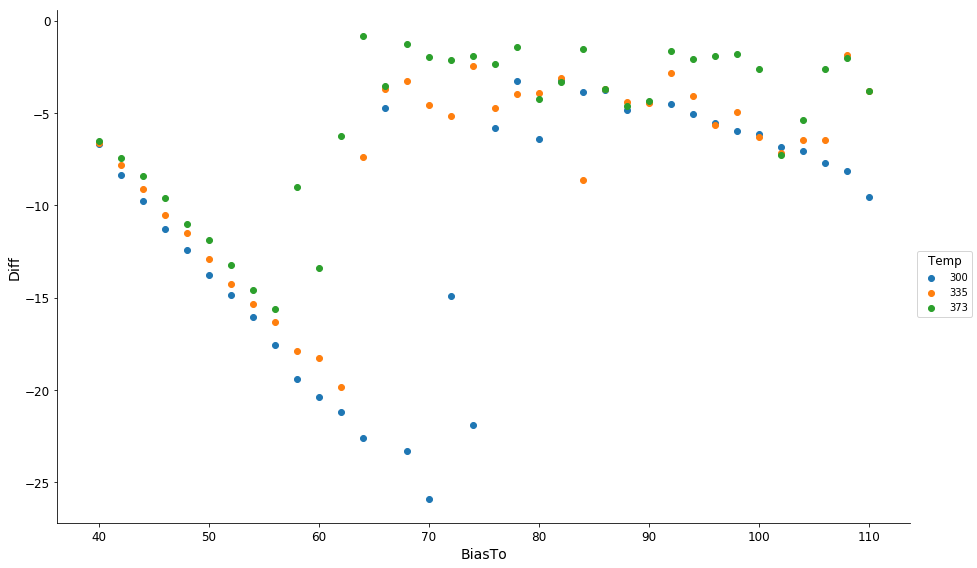

In [3]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second/rerun_7_14_May_124103.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun7 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [54]:
rerun7.columnsmns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'Dis_h56',
       'z_average', 'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5',
       'z_h6', 'AMH', 'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2',
       'rg3', 'rg4', 'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Lipid10', 'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15',
       'TotalE', 'BiasTo'],
      dtype='object')

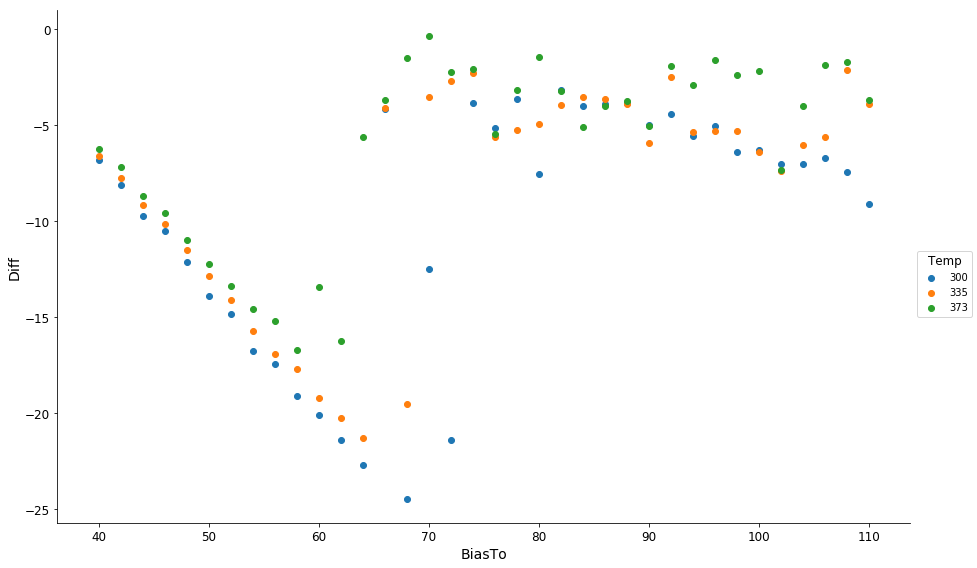

In [60]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second/rerun_6_10_May_222655.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun6 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

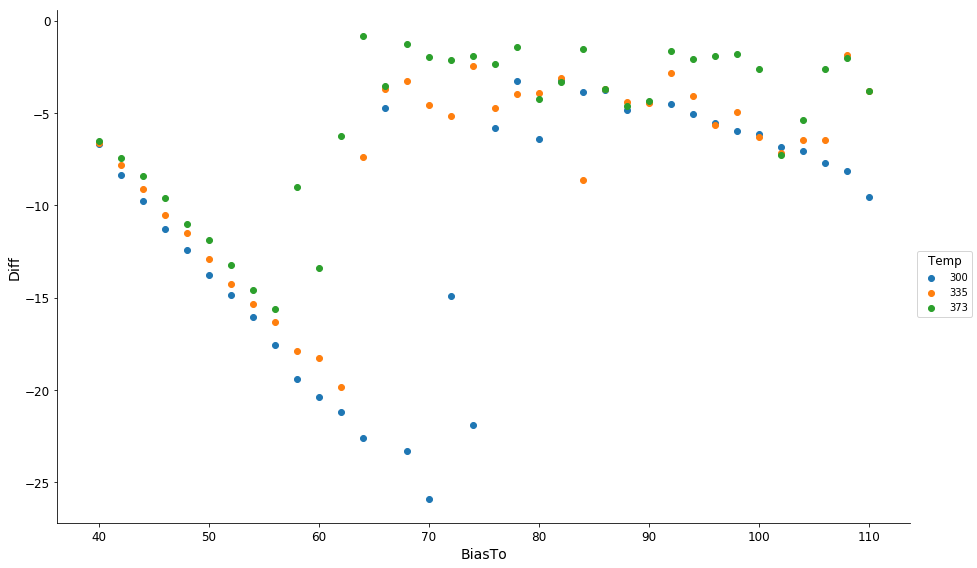

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second/rerun_7_10_May_222655.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun7 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

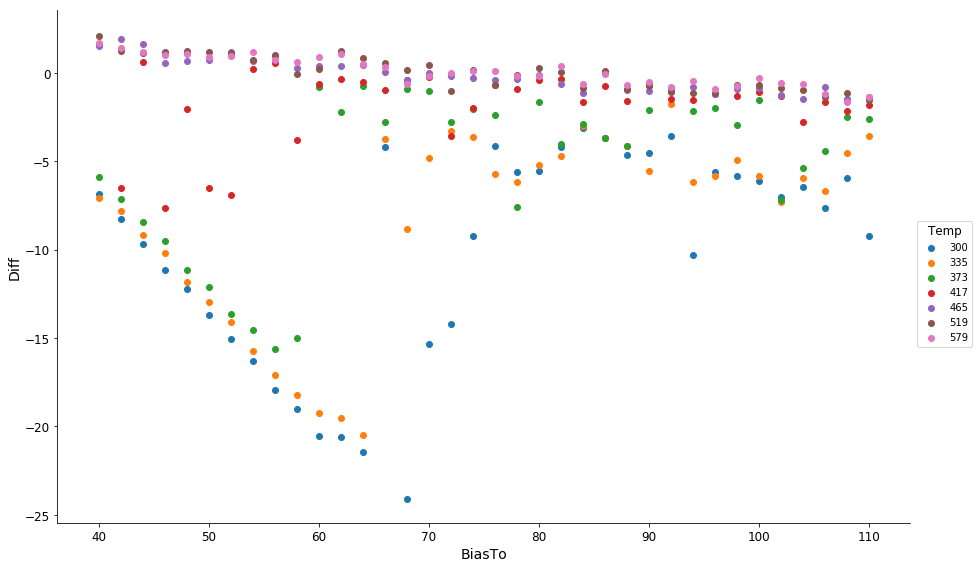

In [3]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second/rerun_5_09_May_225324.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun5 = data
t = a.query("Temp < 600").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [196]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/02_week/all_data_folder/second.feather")

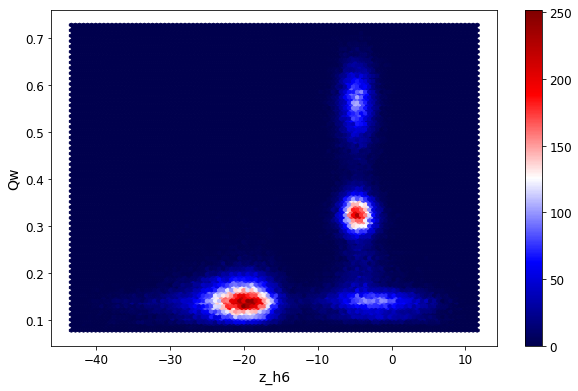

In [8]:
data.query("Temp == 417").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

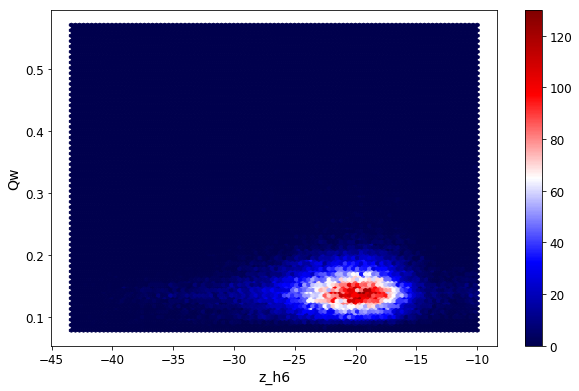

In [9]:
data.query("Temp == 417 and z_h6 < -10").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

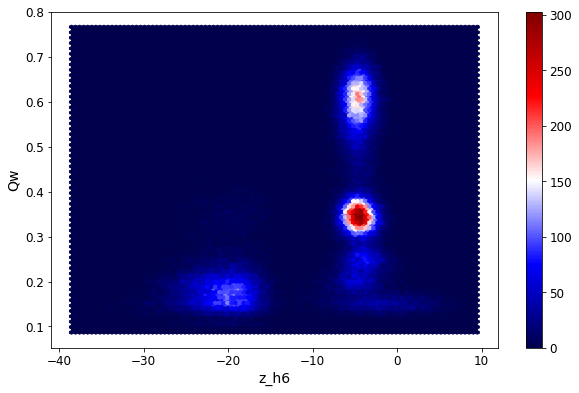

In [4]:
data.query("Temp == 373").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

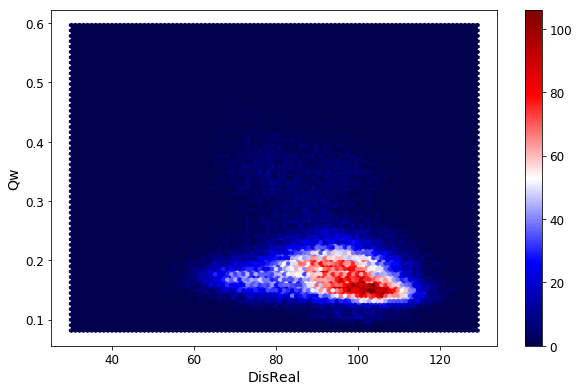

In [202]:
data.query("Temp == 373 and z_h6 < -10").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [208]:
t = data.query("Temp == 373 and z_h6 < -10")
select(t)

count        mean       std        min         25%         50%  \
BiasTo Run                                                                    
100.0  0     403.0   98.484597  5.939790  78.048268   94.697416   99.011737   
       3    3556.0   97.439866  5.797537  73.510047   93.462541   97.432723   
       4     639.0   98.940910  6.025661  81.090999   94.650217   99.121678   
104.0  0     206.0   99.048250  5.323202  84.937206   95.822367   99.179898   
       4     212.0  101.859563  6.361181  83.271376   97.783673  101.592862   
       11   2712.0  100.657426  5.693546  83.333847   96.724036  100.653194   
106.0  2     146.0   99.872891  5.889250  86.056405   95.632202   99.680676   
       3     192.0   98.445090  5.128149  85.069165   94.969211   98.753832   
       4    2276.0  104.241242  5.897537  82.192646  100.297443  104.206005   
       5     704.0  105.286335  6.107093  86.348014  100.934914  104.992214   
       6     408.0  105.865025  5.690973  88.535506  102.172858  106.082831   
       10    134.0  104.515281  5.535674  88.844636  100.631005  104.954048   
108.0  1     498.0  107.355502  6.220350  91.144864  103.034525  106.958635   
       2     570.0  106.913369  5.762108  88.414309  102.750434  106.876047   
       3    1735.0  106.691281  6.059066  82.748179  102.704226  106.720764   
       7    1458.0  105.917929  5.844180  88.646720  101.898002  105.872380   
110.0  5     546.0  107.698187  6.224264  90.239244  103.552380  107.730908   
       6    2695.0  105.880358  5.937300  85.051280  101.804597  105.931880   
       9    1747.0  106.361195  5.802679  83.627516  102.436172  106.508115   
66.0   4     150.0   65.475058  5.915406  50.640952   61.204850   66.018527   
       11    226.0   65.542783  5.846168  50.759672   61.566355   65.701617   
70.0   5    3314.0   69.924845  5.823413  46.984521   65.906052   69.955867   
       7     143.0   70.137746  5.586350  51.702432   67.101043   70.085201   
76.0   0     492.0   73.767350  6.126093  47.615320   69.723507   73.624014   
       1     559.0   75.591337  5.678710  54.693544   71.948207   75.509457   
       3     409.0   76.243397  6.149498  60.116784   71.927846   75.790183   
78.0   0     111.0   77.783536  5.201847  66.347794   74.256604   77.830677   
       2     322.0   77.980005  5.602085  61.222610   74.413772   77.927688   
       4    2687.0   77.558809  6.013306  53.905646   73.440252   77.878536   
80.0   4     544.0   78.141333  6.128454  60.770572   74.086367   78.467103   
       5     382.0   78.567747  5.585530  62.031170   74.869499   78.657591   
       7     507.0   80.776536  5.741168  61.730400   76.984887   80.747553   
       8     841.0   79.570029  6.123078  59.340463   75.454554   79.325227   
84.0   1     787.0   82.654568  5.767250  64.552330   78.641711   82.789952   
       2     281.0   82.169295  5.742680  62.355794   78.255511   81.744499   
       4     198.0   84.586011  5.754888  71.312212   80.846594   84.836077   
90.0   0     184.0   88.816556  5.551126  74.107906   85.100322   87.995040   
       6     188.0   89.795542  5.551273  75.523504   86.051201   89.785101   
       8    3167.0   84.896780  5.367669  68.012101   81.352757   84.894422   
92.0   3     373.0   91.772664  5.516173  74.998883   88.119079   91.541933   
       4     126.0   90.756673  6.391736  73.689769   86.252096   90.552442   
       8     755.0   89.087252  5.355962  69.167446   85.608908   89.176644   
       10    178.0   91.367323  5.468630  74.746103   87.757293   91.852796   
       11   3020.0   90.439586  5.742374  70.882469   86.502726   90.408991   
94.0   2     225.0   92.081935  6.667538  73.176841   87.360671   92.230486   
       3    2489.0   92.442238  5.898143  73.549944   88.334403   92.350111   
       4     357.0   90.230106  5.812051  71.168102   86.399658   90.607878   
       7     389.0   91.609501  6.035340  73.553283   87.963285   91.632543   
       11    504.0   93.349713  5.847457  77.835830   89.546666

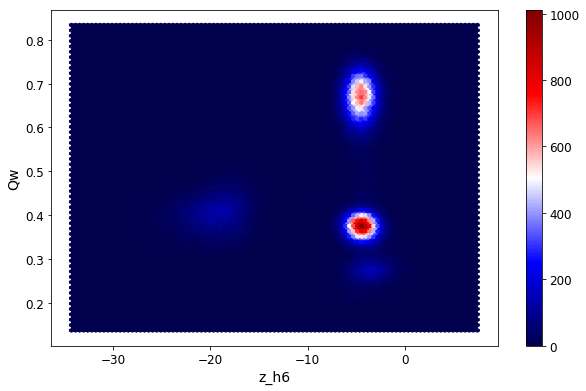

In [197]:
data.query("Temp == 300").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

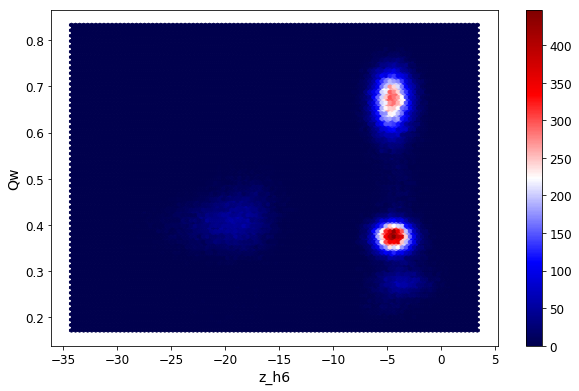

In [130]:
rerun7.query("Temp == 300").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

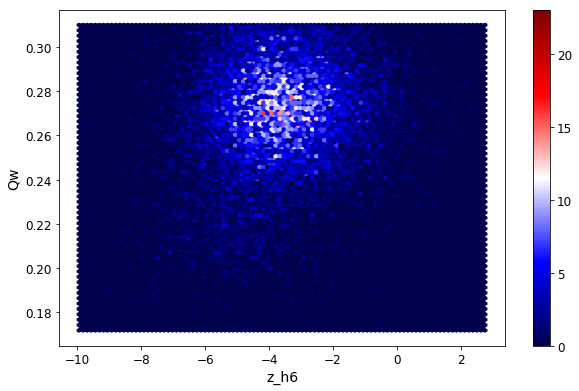

In [206]:
t = data.query("Temp == 300 and Qw < 0.31 and z_h6 > -10")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [207]:
select(t)

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
104.0  7     375.0  96.572291  4.512156  84.054471  93.515349  96.322981   
66.0   2     484.0  62.246462  4.515100  49.530995  58.957065  62.068580   
       3    1199.0  62.025993  4.371451  46.648777  59.181341  62.014272   
       5    2725.0  61.713339  4.293977  43.420731  58.769665  61.765367   
70.0   1     232.0  63.618001  4.383396  48.825907  60.777872  63.548697   
76.0   0     275.0  68.536339  3.922397  55.980488  66.244700  68.090128   
       4    1574.0  67.518532  3.952661  46.604619  64.958573  67.441927   
       5     831.0  67.732441  3.992476  51.316798  64.898616  67.786925   
78.0   10    632.0  71.068567  4.972830  57.489993  67.799464  70.706520   
80.0   0    1491.0  71.249152  4.870894  53.486660  68.054983  71.155559   
       7    1169.0  70.416314  4.356603  51.450569  67.590995  70.262420   
84.0   10    174.0  79.138098  4.930211  68.456198  76.248534  79.565527   
94.0   2     350.0  79.854604  5.111356  68.482505  76.094154  79.570511   

                   75%         max  
BiasTo Run                          
104.0  7    100.043510  109.806808  
66.0   2     65.361498   75.040679  
       3     64.807609   75.627741  
       5     64.681287   75.656634  
70.0   1     66.567819   75.431042  
76.0   0     70.946116   80.691266  
       4     70.267016   80.616266  
       5     70.490090   78.776052  
78.0   10    74.115063   87.235756  
80.0   0     74.340792   87.777016  
       7     73.238760   84.501971  
84.0   10    82.179449   92.390535  
94.0   2     83.607998   95.275141

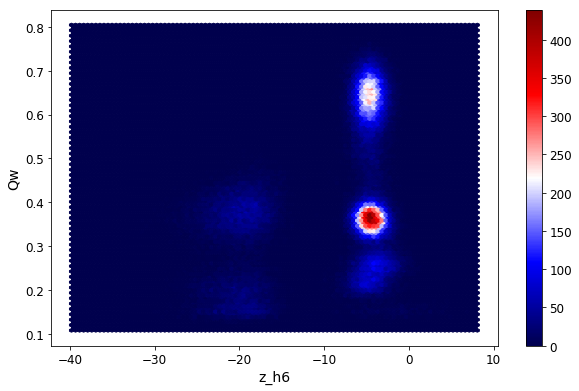

In [129]:
rerun7.query("Temp == 335").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [135]:
t = rerun7.query("Temp == 335 and z_h6 < -10 and Qw > 0.3").reset_index()
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)

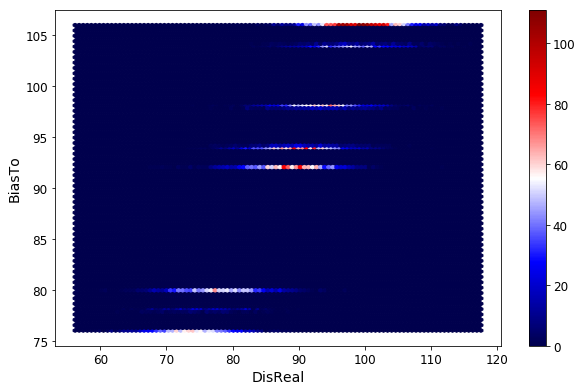

In [136]:
t.plot.hexbin("DisReal", "BiasTo", cmap="seismic", sharex=False)

In [138]:
select(t)

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
76.0   1    1232.0  74.023480  5.210408  57.210694  70.545582  73.997634   
78.0   11    435.0  75.826089  4.993334  62.653720  72.263523  75.798713   
80.0   4    1207.0  78.162645  5.717167  56.193863  74.238322  78.106893   
92.0   8     999.0  88.185082  5.552502  67.605961  84.575248  88.456036   
       10    498.0  88.887020  5.182846  71.724760  85.739568  88.962525   
94.0   4    1931.0  90.083078  5.347994  73.388469  86.532110  90.093899   
98.0   5    1671.0  93.584790  5.346931  73.880812  89.981211  93.645185   
104.0  0    1305.0  98.226970  5.577615  82.832468  94.284345  98.011747   
106.0  2    1124.0  98.700564  5.091508  83.843885  95.180261  98.778207   
       3    1156.0  99.843058  5.455630  80.715249  96.200114  99.675574   

                   75%         max  
BiasTo Run                          
76.0   1     77.587033   89.862177  
78.0   11    79.233851   89.965252  
80.0   4     82.093252   97.122317  
92.0   8     91.870253  102.263162  
       10    92.439484  111.987214  
94.0   4     93.600551  110.214724  
98.0   5     96.998368  111.659439  
104.0  0    101.903629  115.968868  
106.0  2    102.321804  114.406352  
       3    103.325774  117.523148

In [139]:
t.groupby("BiasTo").mean()

index          Step        Run   Temp        Qw      Energy  \
BiasTo                                                                        
76.0     75829.662338  7.528022e+07   1.000000  335.0  0.419714 -787.198097   
78.0    619376.616972  7.645921e+07  10.983945  335.0  0.409959 -787.251531   
80.0    255059.017899  7.502232e+07   4.060700  335.0  0.396330 -784.359298   
92.0    881826.733467  7.394336e+07   8.665331  335.0  0.347718 -782.143076   
94.0    734348.741585  7.478558e+07   4.000000  335.0  0.385017 -783.835478   
98.0    823450.723519  7.448591e+07   5.000000  335.0  0.375689 -780.905506   
104.0   766116.928736  7.537631e+07   0.000000  335.0  0.370812 -781.640884   
106.0   525019.328070  7.500961e+07   2.507018  335.0  0.371979 -782.297658   

          DisReal    Dis_h56  z_average  abs_z_average     ...         Lipid9  \
BiasTo                                                     ...                  
76.0    74.023480  54.882649  -5.737391      11.824347     ...       0.000222   
78.0    75.836519  57.293225  -6.011798      12.176148     ...       0.000204   
80.0    78.093356  58.685099  -5.914600      12.221533     ...       0.000193   
92.0    88.418592  63.824719  -5.856301      12.851031     ...       0.000150   
94.0    90.083078  65.207152  -6.173366      12.465942     ...       0.000146   
98.0    93.584790  65.477133  -6.345546      12.578557     ...       0.000143   
104.0   98.226970  67.105505  -6.295991      12.561866     ...       0.000140   
106.0   99.279828  68.600422  -6.280674      12.501022     ...       0.000146   

         Lipid10   Lipid11   Lipid12   Lipid13   Lipid14   Lipid15  \
BiasTo                                                               
76.0   -1.677559  0.366727  0.001223 -1.043504  0.004785  0.024278   
78.0   -1.660428  0.345270  0.001171 -0.697068  0.002623  0.013702   
80.0   -1.680375  0.316662  0.000339 -0.524596  0.001458  0.015074   
92.0   -1.569978  0.253060  0.000201 -0.147005  0.000554  0.003983   
94.0   -1.670282  0.223013  0.000146 -0.054047  0.000139  0.002255   
98.0   -1.706769  0.168946  0.000143  0.022783  0.000137  0.002268   
104.0  -1.711540  0.187432  0.000141  0.066696  0.000135  0.000767   
106.0  -1.676519  0.199154  0.000147  0.054261  0.000139  0.000628   

            TotalE    enhanced    enhanced2  
BiasTo                                       
76.0   -793.068318 -813.945117 -1001.836312  
78.0   -792.749564 -813.696687 -1002.220790  
80.0   -789.806079 -810.654118  -998.286468  
92.0   -787.663398 -808.193521  -992.964629  
94.0   -788.807472 -809.641429  -997.147043  
98.0   -786.040861 -806.925884  -994.891092  
104.0  -786.768213 -807.602480  -995.110889  
106.0  -787.300055 -808.106092  -995.360423  

[8 rows x 47 columns]

In [ ]:
rerun7.query("Temp == 335 and z_h6 < -10").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

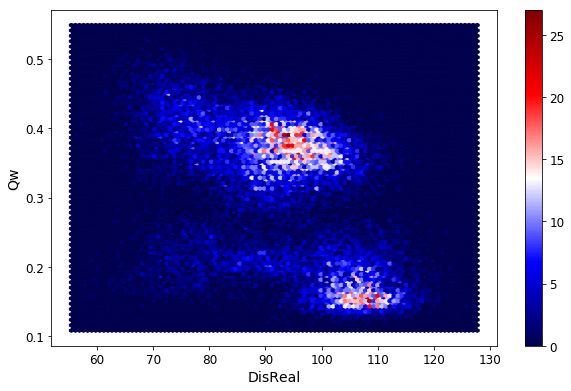

In [127]:
rerun7.query("Temp == 335 and z_h6 < -10").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

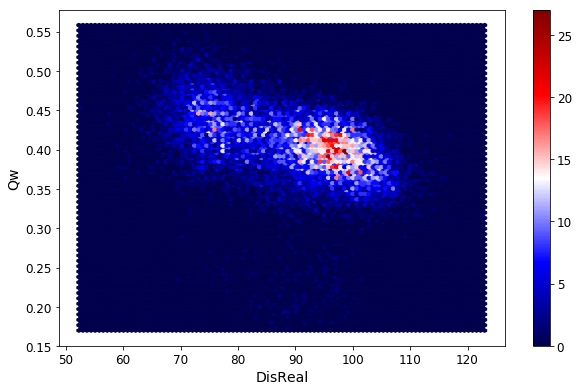

In [126]:
rerun7.query("Temp == 300 and z_h6 < -10").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

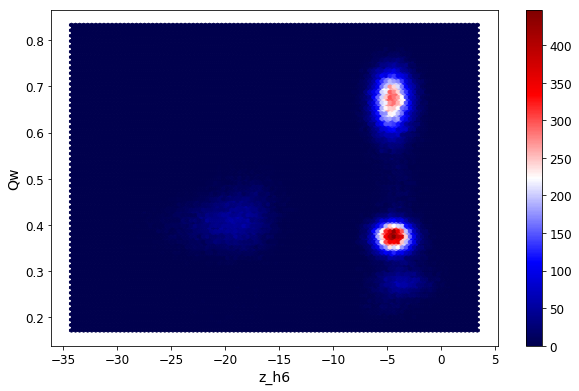

In [140]:
rerun7.query("Temp == 300").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

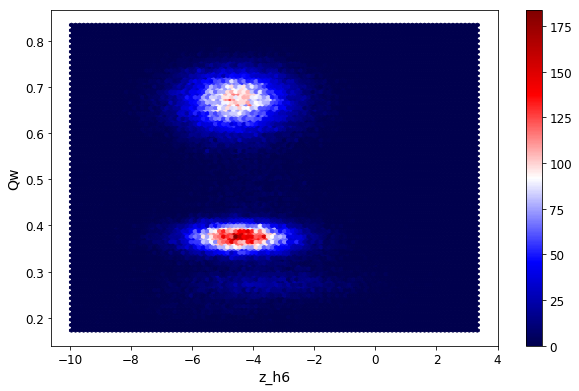

In [141]:
rerun7.query("Temp == 300 and z_h6 > -10").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

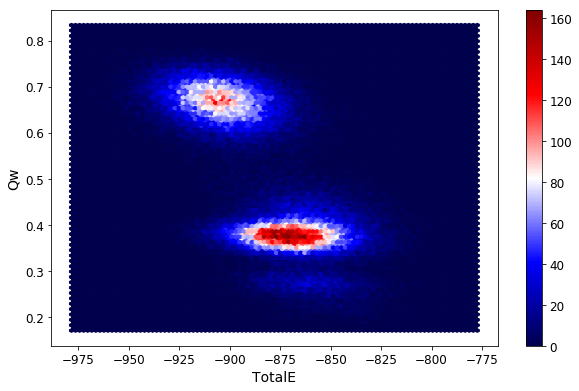

In [148]:
rerun7.query("Temp == 300").plot.hexbin("TotalE", "Qw", cmap="seismic", sharex=False)

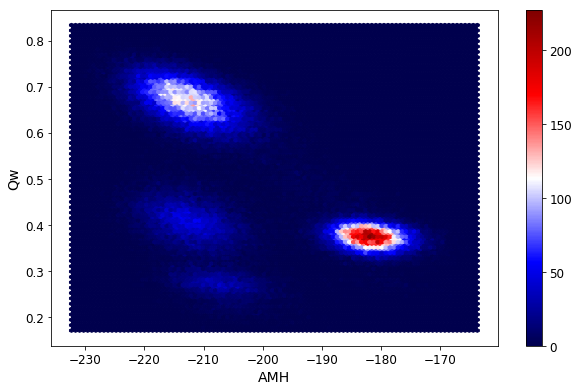

In [143]:
rerun7.query("Temp == 300").plot.hexbin("AMH", "Qw", cmap="seismic", sharex=False)

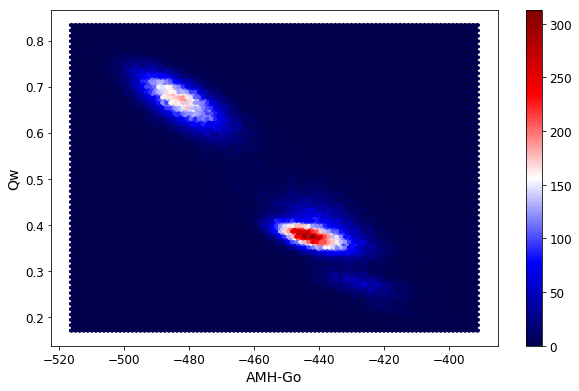

In [123]:
rerun7.query("Temp == 300").plot.hexbin("AMH-Go", "Qw", cmap="seismic", sharex=False)

In [ ]:
rerun7.query("Temp == 300 and z_h6 > -10").plot.hexbin("AMH", "Qw", cmap="seismic", sharex=False)

In [156]:
t = rerun7.query("Temp == 300 and z_h6 < -10 and Qw < 0.5 and Qw > 0.3")
t2 = rerun7.query("Temp == 300 and z_h6 > -10 and Qw < 0.5 and Qw > 0.3")

In [157]:
t.mean() -t2.mean()

Step            -40027.105220
Run                  1.111502
Temp                 0.000000
Qw                   0.033665
Energy               9.276162
DisReal              2.985601
Dis_h56             39.384051
z_average           -4.129847
abs_z_average        1.650376
z_h1                -1.096086
z_h2                 0.766060
z_h3                -1.332612
z_h4                -0.621439
z_h5                -7.602725
z_h6               -15.213754
AMH                -29.187641
Distance             8.758229
AMH-Go               5.801109
Membrane             3.100466
Rg                  -0.737857
rg1                 -0.210990
rg2                 -0.457798
rg3                  1.023306
rg4                 -0.605790
rg5                  0.600256
rg6                 -1.086841
rg_all              -0.737857
Lipid                6.086390
Lipid1              -1.565623
Lipid2              -0.234741
Lipid3               0.577340
Lipid4               0.194780
Lipid5              -0.002457
Lipid6    

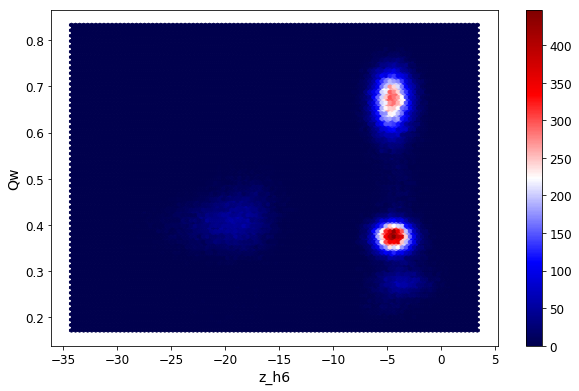

In [171]:
t = rerun7.query("Temp == 300")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

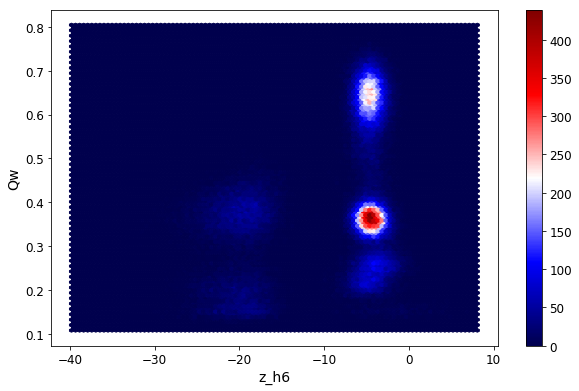

In [172]:
t = rerun7.query("Temp == 335")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

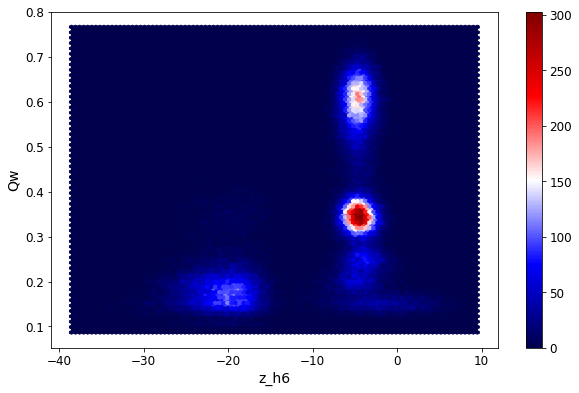

In [173]:
t = rerun7.query("Temp == 373")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

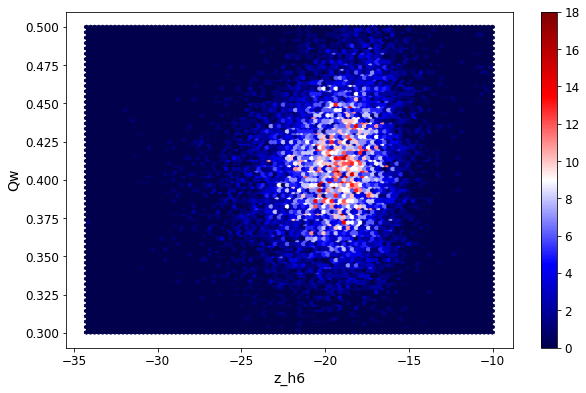

In [169]:
t = rerun7.query("Temp == 300 and z_h6 < -10 and Qw < 0.5 and Qw > 0.3")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [155]:
select(t)

count       mean       std        min        25%         50%  \
BiasTo Run                                                                  
104.0  0     983.0  97.236719  4.697942  75.259632  94.172471   97.209757   
106.0  2    1282.0  98.091455  5.104332  82.959509  94.723268   97.865912   
       3    1216.0  98.478695  4.999915  84.474095  94.966816   98.486398   
108.0  5    2494.0  99.859955  5.161321  78.890574  96.420361  100.032860   
76.0   1    1036.0  73.682215  5.332250  57.548284  70.103801   73.575262   
78.0   11   1876.0  75.739058  4.809065  57.741314  72.539339   75.741932   
80.0   4     828.0  77.300188  5.408708  52.286470  73.709286   77.506979   
       5     174.0  75.664075  4.950528  62.046244  72.363856   74.990368   
92.0   8     429.0  86.786188  5.309282  72.056644  83.231807   86.634892   
       10   1957.0  87.644650  5.030138  68.489670  84.281224   87.662472   
94.0   4     317.0  89.639420  4.359607  76.309859  86.817685   89.658139   
98.0   5     778.0  92.530223  4.506419  78.944036  89.431657   92.545338   

                   75%         max  
BiasTo Run                          
104.0  0    100.218575  111.752813  
106.0  2    101.486439  116.643485  
       3    101.926884  116.512454  
108.0  5    103.269771  122.993387  
76.0   1     77.109914   92.262656  
78.0   11    78.918162   90.481713  
80.0   4     80.832618   94.992811  
       5     78.711984   92.407676  
92.0   8     90.337822  100.475586  
       10    91.091389  104.262747  
94.0   4     92.808264   99.602752  
98.0   5     95.640610  104.433651

# Temp335, wanted region

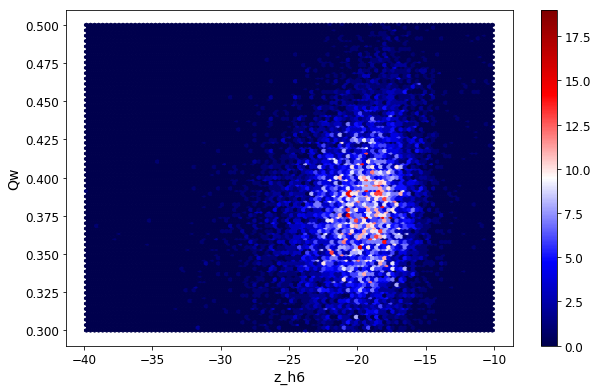

In [160]:
t = rerun7.query("Temp == 335 and z_h6 < -10 and Qw < 0.5 and Qw > 0.3")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [161]:
select(t)

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
104.0  0    1305.0  98.226970  5.577615  82.832468  94.284345  98.011747   
106.0  2    1124.0  98.700564  5.091508  83.843885  95.180261  98.778207   
       3    1156.0  99.843058  5.455630  80.715249  96.200114  99.675574   
76.0   1    1209.0  74.082361  5.210250  57.210694  70.590253  74.059621   
78.0   11    433.0  75.840299  4.989808  62.653720  72.269304  75.798713   
80.0   4    1199.0  78.205718  5.708883  56.193863  74.292922  78.135024   
92.0   8     999.0  88.185082  5.552502  67.605961  84.575248  88.456036   
       10    498.0  88.887020  5.182846  71.724760  85.739568  88.962525   
94.0   4    1930.0  90.079729  5.347355  73.388469  86.531275  90.093425   
98.0   5    1671.0  93.584790  5.346931  73.880812  89.981211  93.645185   

                   75%         max  
BiasTo Run                          
104.0  0    101.903629  115.968868  
106.0  2    102.321804  114.406352  
       3    103.325774  117.523148  
76.0   1     77.666870   89.862177  
78.0   11    79.234013   89.965252  
80.0   4     82.098996   97.122317  
92.0   8     91.870253  102.263162  
       10    92.439484  111.987214  
94.0   4     93.595895  110.214724  
98.0   5     96.998368  111.659439

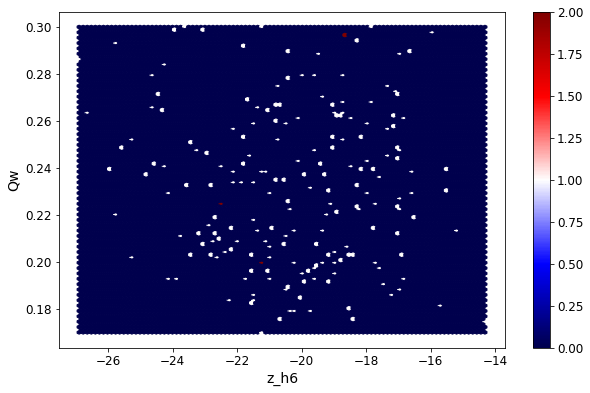

In [153]:
t = rerun7.query("Temp == 300 and z_h6 < -10 and Qw < 0.3")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [145]:
select(t)

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
104.0  7     181.0  95.704018  4.556815  84.970460  92.664524  95.238269   
66.0   2     127.0  63.392083  5.284954  50.822627  59.355286  63.830648   
       3     155.0  62.076760  4.753613  46.648777  58.998967  62.410232   
       5    1666.0  61.815108  4.326926  45.625209  58.908376  61.907398   
76.0   4     492.0  67.842105  4.139229  54.946519  65.129913  67.681245   
       5     798.0  67.845849  3.960630  51.316798  65.086735  67.965995   
78.0   10    384.0  71.311397  5.041818  57.489993  68.265122  71.306240   
80.0   0     290.0  75.385777  4.865265  62.964775  71.913314  75.275187   
       7     932.0  70.427112  4.340987  51.450569  67.656081  70.256717   

                  75%         max  
BiasTo Run                         
104.0  7    98.807743  109.233188  
66.0   2    66.905153   75.040679  
       3    64.652787   72.970265  
       5    64.787320   75.504473  
76.0   4    70.528308   80.616266  
       5    70.556356   78.776052  
78.0   10   74.418030   87.235756  
80.0   0    78.224935   87.777016  
       7    73.236985   84.501971

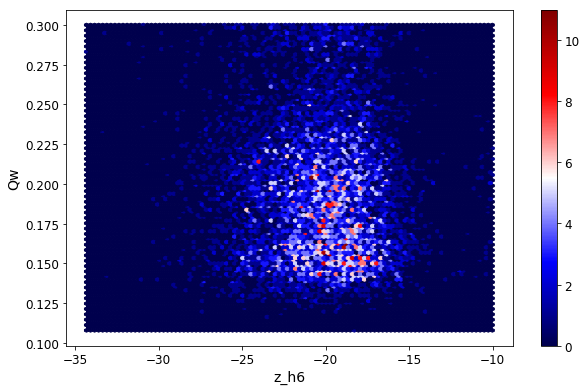

In [151]:
t = rerun7.query("Temp == 335 and z_h6 < -10 and Qw < 0.3")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [152]:
select(t)

count        mean       std        min         25%         50%  \
BiasTo Run                                                                    
100.0  3     136.0   98.840375  5.872436  81.748690   94.793803   98.951190   
106.0  4     182.0  102.647867  5.657400  88.295833   99.029522  103.068476   
108.0  3     483.0  106.920396  5.681707  88.389125  103.107503  107.051994   
       7    1333.0  106.851431  5.410414  90.730532  103.418882  106.944734   
110.0  6    1212.0  105.872857  5.306306  87.915961  102.181067  105.922211   
       9    1282.0  106.449395  5.887841  88.107756  102.389418  106.634050   
70.0   5     146.0   69.508859  5.876744  55.408850   65.762495   69.508667   
78.0   4     789.0   77.486859  5.509485  60.157298   73.571904   77.627943   
90.0   8     142.0   85.060585  5.395871  69.202456   81.483329   86.163437   
92.0   8     360.0   90.710870  5.285816  75.402805   86.963804   90.890556   
       11    639.0   90.017243  5.530319  70.784876   86.177460   90.119480   
94.0   3     107.0   91.393083  5.359421  79.516887   88.143413   91.020247   

                   75%         max  
BiasTo Run                          
100.0  3    102.267697  118.880136  
106.0  4    106.180091  121.598446  
108.0  3    110.643596  125.874266  
       7    110.435660  127.743628  
110.0  6    109.488765  124.152208  
       9    110.480290  123.156433  
70.0   5     72.841833   94.763460  
78.0   4     81.239824   93.446632  
90.0   8     88.939565   95.660959  
92.0   8     94.191739  108.057062  
       11    93.623069  108.551149  
94.0   3     94.283203  109.622892

In [117]:
t.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'Dis_h56',
       'z_average', 'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5',
       'z_h6', 'AMH', 'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2',
       'rg3', 'rg4', 'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Lipid10', 'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15',
       'TotalE', 'BiasTo', 'enhanced', 'enhanced2'],
      dtype='object')

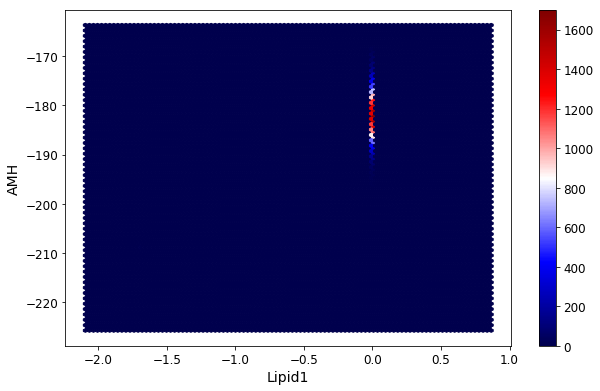

In [118]:
t.plot.hexbin("Lipid1", "AMH", cmap="seismic", sharex=False)

In [108]:
select(t)

count        mean       std        min        25%         50%  \
BiasTo Run                                                                   
100.0  1    1344.0   93.739921  4.829096  76.597129  90.436084   93.816887   
       6    1152.0   93.961998  4.907248  78.503525  90.558925   93.773596   
102.0  0    1060.0   95.047542  4.858730  81.863895  91.599204   95.031227   
       2     586.0   94.655434  4.835790  79.529447  91.294947   94.794964   
       7     854.0   95.672178  4.737731  79.617564  92.335672   95.723774   
104.0  6    1261.0   96.838378  4.764481  80.442750  93.729193   96.929333   
110.0  2    2500.0  100.439827  4.609377  82.772876  97.472245  100.582246   
66.0   2     115.0   56.892185  5.208173  46.560253  53.029286   55.942171   
       5     404.0   59.630234  4.542320  47.724268  56.500025   59.603640   
72.0   0     310.0   69.015500  5.081561  55.036318  65.718810   68.680601   
       2     144.0   70.372106  5.192965  57.916279  67.242665   70.372535   
       3     286.0   62.851360  6.354464  39.189974  58.465329   62.364260   
       4     463.0   66.936584  6.371157  50.609825  62.263840   67.011289   
74.0   0     252.0   64.989668  6.054383  49.300670  60.235169   64.670696   
       2     318.0   70.868808  5.996328  54.662364  66.535393   70.901771   
80.0   7     238.0   69.192168  4.425097  53.926003  66.603126   69.572762   
82.0   5     664.0   78.840254  5.345531  62.806017  74.781704   79.028465   
       6     290.0   79.022581  5.182845  65.884464  75.570929   79.567430   
       7    1546.0   78.750397  5.292564  62.101646  75.177194   78.817003   
84.0   6    2424.0   80.212850  5.190536  61.418306  76.763290   80.392789   
86.0   0     527.0   82.090873  5.179481  61.981805  78.718268   82.598812   
       2     682.0   82.136701  5.071516  65.376241  78.505408   82.228693   
       11   1289.0   82.415968  5.158262  60.801621  78.792135   82.443226   
88.0   0    1058.0   83.287597  5.051166  67.521587  79.926195   83.257594   
       1     905.0   82.851621  5.153717  64.843652  79.496369   82.911188   
       2     536.0   83.288159  5.010807  67.245506  80.175252   83.269269   
90.0   3    1427.0   85.839335  5.260269  68.794344  82.390861   85.925972   
       4    1069.0   85.210802  5.184047  71.351261  81.760753   85.341930   
94.0   9    2094.0   88.672770  5.152129  69.705641  85.150322   88.745308   
96.0   2     990.0   90.360002  4.759186  73.864911  87.236680   90.485402   
       11   1508.0   90.500384  4.930110  74.030324  87.237547   90.590971   
98.0   0    1717.0   91.783479  4.812580  76.399939  88.526971   91.727303   

                   75%         max  
BiasTo Run                          
100.0  1     97.065467  108.074121  
       6     97.240900  110.069962  
102.0  0     98.466960  110.032530  
       2     98.039465  107.841112  
       7     98.825936  111.404108  
104.0  6    100.066832  110.898993  
110.0  2    103.588942  114.353968  
66.0   2     60.134293   69.839406  
       5     62.819179   71.914630  
72.0   0     72.249303   83.855850  
       2     73.405910   84.579602  
       3     66.805590   81.096443  
       4     71.976895   84.190385  
74.0   0     68.910969   84.327793  
       2     74.815786   86.762215  
80.0   7     72.104206   79.399960  
82.0   5     82.530266   96.714158  
       6     82.307026   92.508899  
       7     82.445296   94.467419  
84.0   6     83.824336   98.104186  
86.0   0     85.667924   95.301165  
       2     85.430776   98.537159  
       11    86.120502   98.121379  
88.0   0     86.702555  103.561156  
       1     86.405320   98.628496  
       2     86.671535   97.111914  
90.0   3     89.457583  100.868411  
       4     88.638737  103.316232  
94.0   9     92.242128  107.103057  
96.0   2     93.415012  104.335169  
       11    93.829245  106.865277  
98.0   0     95.012397  107.011335

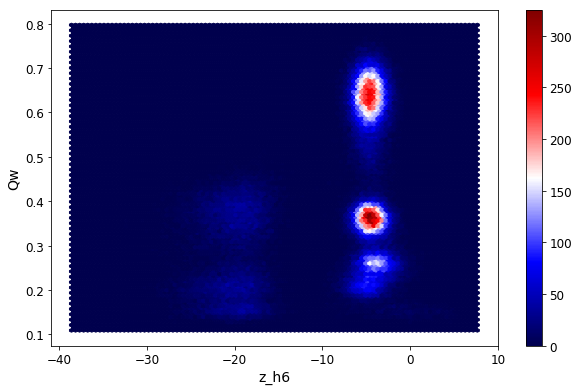

In [62]:
rerun7.query("Temp == 335").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

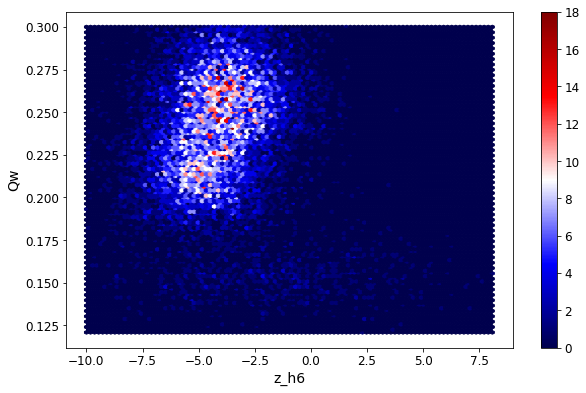

In [102]:
t = rerun7.query("Temp == 335 and z_h6 > -10 and Qw < 0.3")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [103]:
select(t)

count        mean       std        min         25%         50%  \
BiasTo Run                                                                    
104.0  7     503.0   96.805466  5.026233  80.831984   93.383301   96.984779   
108.0  3     105.0  103.824539  5.551262  90.494543  100.443721  103.523975   
       7     496.0  104.489229  6.017674  83.234628  100.604054  104.699169   
66.0   2    1118.0   63.570074  5.439647  47.022188   60.127977   63.844380   
       3     792.0   61.834833  4.890437  43.536531   58.766801   61.973693   
       5     380.0   61.710804  4.590486  49.125158   58.875060   61.911292   
70.0   1    2056.0   65.263962  5.051822  48.928592   61.976684   65.230626   
       2     268.0   65.230997  4.281779  52.700050   62.649558   65.129007   
76.0   4     546.0   67.995746  4.038022  54.134906   65.276607   68.048017   
       5     507.0   68.530166  4.168303  52.777854   65.775465   68.787612   
78.0   10   1236.0   71.254981  5.181210  54.691566   67.501270   71.073344   
80.0   0     560.0   75.581667  5.436957  59.119359   71.950844   75.759115   
       7     575.0   72.581609  5.344538  54.551706   69.061007   72.371437   
84.0   10   2252.0   75.190994  5.087048  58.970575   71.842171   75.080753   

                   75%         max  
BiasTo Run                          
104.0  7    100.465932  110.408008  
108.0  3    107.291589  119.551861  
       7    108.443992  121.867900  
66.0   2     67.059324   80.089843  
       3     65.249880   77.481811  
       5     64.921578   73.392718  
70.0   1     68.519613   81.578480  
       2     68.007928   79.894626  
76.0   4     70.746849   80.147184  
       5     71.674239   79.993216  
78.0   10    74.661424   91.038049  
80.0   0     79.173425   91.556416  
       7     76.153751   89.313031  
84.0   10    78.651520   91.272381

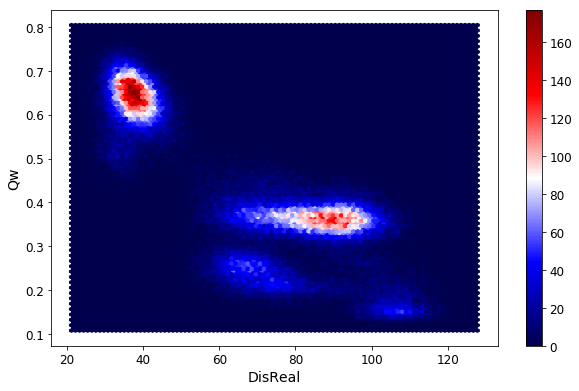

In [67]:
rerun7.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

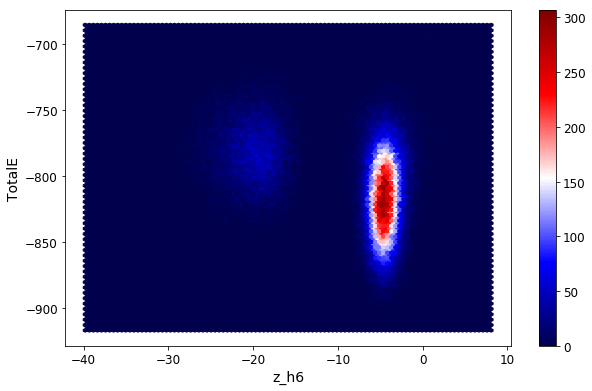

In [96]:
rerun7.query("Temp == 335").plot.hexbin("z_h6", "TotalE", cmap="seismic", sharex=False)

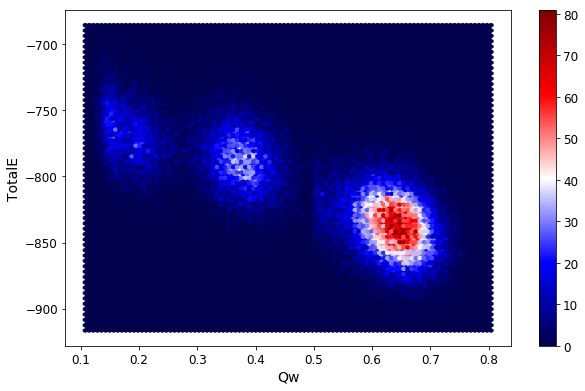

In [98]:
rerun7.query("Temp == 335 and (z_h6 < -10 or Qw > 0.5)").plot.hexbin("Qw", "TotalE", cmap="seismic", sharex=False)

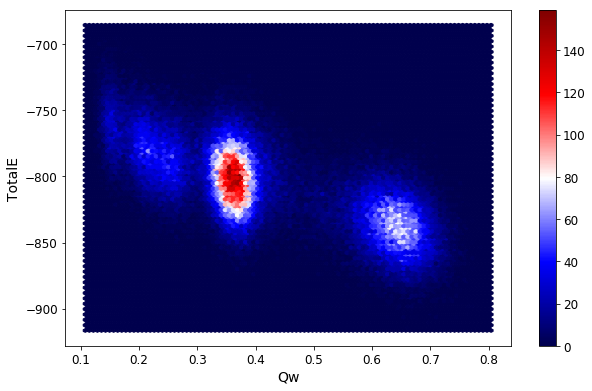

In [99]:
rerun7.query("Temp == 335").plot.hexbin("Qw", "TotalE", cmap="seismic", sharex=False)

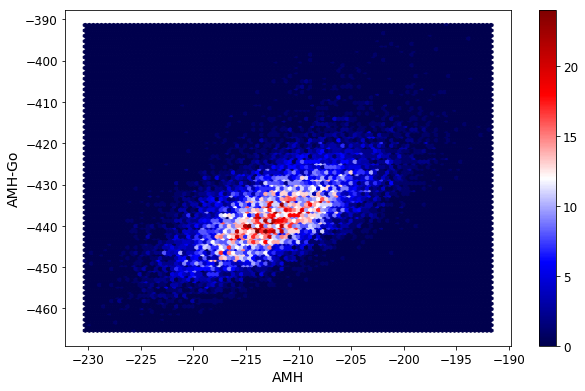

In [58]:
rerun7.query("Temp == 300 and z_h6 < -10").plot.hexbin("AMH", "AMH-Go", cmap="seismic", sharex=False)

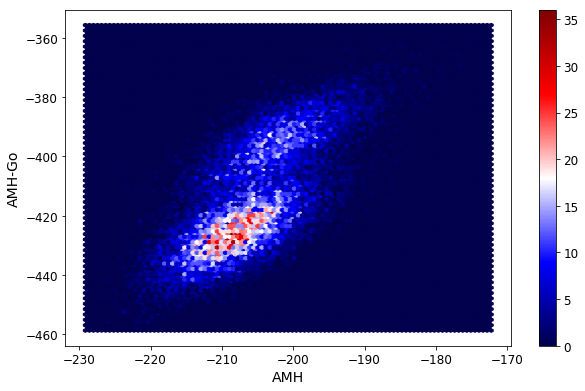

In [66]:
rerun7.query("Temp == 335 and z_h6 < -10").plot.hexbin("AMH", "AMH-Go", cmap="seismic", sharex=False)

In [83]:
rerun7.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'Dis_h56',
       'z_average', 'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5',
       'z_h6', 'AMH', 'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2',
       'rg3', 'rg4', 'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Lipid10', 'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15',
       'TotalE', 'BiasTo', 'enhanced'],
      dtype='object')

In [84]:
rerun7["enhanced"] = rerun7["AMH"]*0.1 + rerun7["TotalE"]

In [87]:
rerun7["enhanced2"] = rerun7["AMH"] + rerun7["TotalE"]

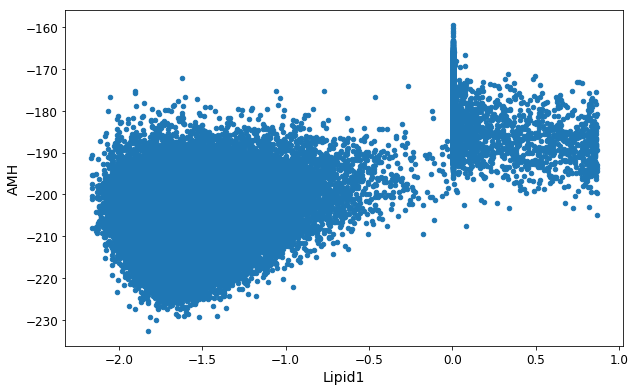

In [94]:
rerun7.query("Temp == 335").plot.scatter("Lipid1", "AMH")

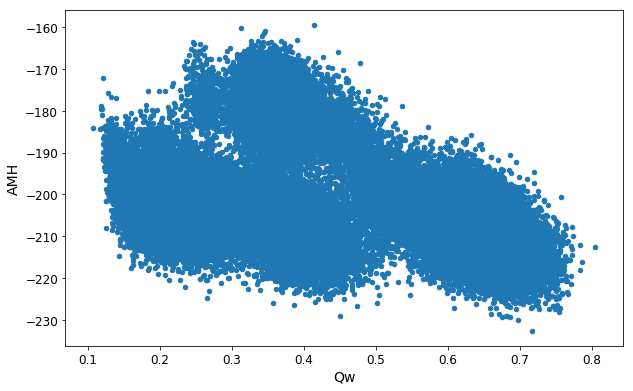

In [92]:
rerun7.query("Temp == 335").plot.scatter("Qw", "AMH")

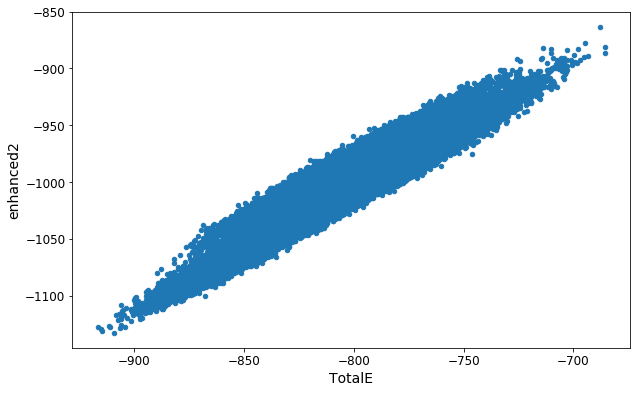

In [88]:
rerun7.query("Temp == 335").plot.scatter("TotalE", "enhanced2")

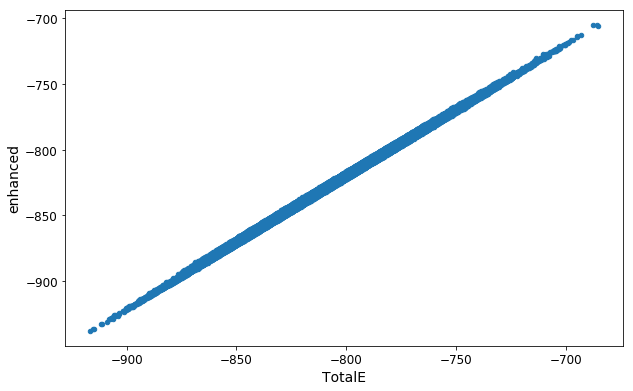

In [86]:
rerun7.query("Temp == 335").plot.scatter("TotalE", "enhanced")

In [72]:
data = pd.read_table("/Users/weilu/Research/server/may_2018/02_week/second_enhance_n/_280-350/data_7/t_335_dis_100.0.dat", sep="\s+", names=["a1","a2","a3","a4", "a5", "a6", "a7", "a8"])

In [81]:
data

a1        a2          a3        a4         a5          a6  \
0    -848.062680  0.371843   89.419086 -5.550026  24.142770 -866.495354   
1    -825.801928  0.360622   95.509853 -6.432038  27.230851 -843.940460   
2    -804.013015  0.370880  100.204664 -4.453149  27.833397 -821.866843   
3    -786.241257  0.338644   99.608381 -2.743801  27.545341 -804.611315   
4    -792.362325  0.339949   91.890189 -3.097147  25.132732 -810.551748   
5    -804.361112  0.371725   95.307202 -5.211897  27.082258 -822.429893   
6    -804.454067  0.373111   93.365520 -4.313025  27.776401 -822.900520   
7    -789.206315  0.384949   92.448653 -3.594229  28.725457 -806.942475   
8    -793.981893  0.369531   97.572975 -4.377663  24.152385 -812.174765   
9    -789.943527  0.397492   98.874028 -4.431319  26.869133 -808.058250   
10   -805.901387  0.369929   97.733608 -4.751722  27.287797 -824.102961   
11   -788.092091  0.353509   97.801154 -5.954886  27.128325 -806.211869   
12   -799.650069  0.363966   93.270567 -5.275772  24.742191 -817.501508   
13   -803.225592  0.363167   89.784314 -5.221382  27.219930 -820.796438   
14   -790.741595  0.378511   91.209741 -3.635619  27.503238 -808.471900   
15   -801.486938  0.373480   88.652136 -4.884662  27.443398 -818.786466   
16   -809.694671  0.374829   90.941280 -3.762580  25.466415 -827.817710   
17   -780.929613  0.322455   94.268469 -2.095740  28.038457 -799.113345   
18   -792.189368  0.320459   87.862741 -3.959362  28.000469 -810.166615   
19   -814.794796  0.344854  100.168828 -4.134487  26.838942 -832.890855   
20   -824.342404  0.364535   89.225769 -4.904087  26.382354 -842.390222   
21   -795.343249  0.376741  101.060386 -5.916863  25.828717 -813.679014   
22   -792.180732  0.376105   95.723035 -2.863002  27.983336 -810.365881   
23   -837.505081  0.338709   90.926340 -1.925900  26.085302 -855.833815   
24   -811.142488  0.365281   87.317114 -3.651708  25.771002 -829.458658   
25   -797.827594  0.348935   99.215040 -5.466354  27.737486 -816.585110   
26   -813.914943  0.373646   97.237467 -5.347568  26.159811 -831.206489   
27   -783.419286  0.388469   97.585765 -3.615397  24.188813 -801.601609   
28   -774.463595  0.341117   92.681570 -3.310369  24.824912 -791.415814   
29   -780.044686  0.350181   86.285308 -4.100954  24.675964 -797.641496   
...          ...       ...         ...       ...        ...         ...   
2470 -825.329019  0.372482   89.689026 -5.297631  25.259350 -843.339012   
2471 -820.160994  0.374059   91.279553 -4.255118  24.096570 -838.010725   
2472 -816.714196  0.367177   93.940100 -4.633639  26.027035 -834.579790   
2473 -822.189248  0.374292   91.434122 -4.500072  25.825960 -840.034205   
2474 -807.434216  0.358395   87.280719 -4.345500  22.133639 -824.635343   
2475 -822.550077  0.338453   86.135569 -4.606000  25.019070 -840.865143   
2476 -811.559102  0.353910   87.198928 -4.451547  28.810078 -829.547590   
2477 -816.202396  0.344184   85.269396 -4.788271  22.869768 -833.876486   
2478 -814.974381  0.379269   87.845473 -5.294356  25.150339 -832.962809   
2479 -783.927055  0.346572   81.333835 -5.047130  26.812051 -801.943957   
2480 -794.623961  0.374015   87.272250 -6.365755  25.134897 -812.702323   
2481 -766.527549  0.337260   94.464363 -4.076230  23.871932 -784.134693   
2482 -789.407031  0.360164   89.174012 -4.222550  26.377044 -807.486456   
2483 -800.732886  0.358768   94.817906 -5.147075  23.939407 -818.506449   
2484 -817.602229  0.383473   92.104003 -5.015728  24.159919 -835.800377   
2485 -816.539032  0.389973   92.678523 -5.233186  26.636598 -834.625139   
2486 -852.004111  0.377993   85.043412 -3.077275  26.827107 -869.962360   
2487 -820.399632  0.370655   94.387430 -4.129747  25.454599 -838.341969   
2488 -786.595298  0.353749   99.483651 -3.891015  25.841147 -803.904098   
2489 -797.509399  0.355116   95.563489 -3.926478  24.095959 -815.835932   
2490 -803.120610  0.380340   98.586404 -3.609563  24.659029 -821.462517   
2491 -831.396782  0.341813  101.159954 

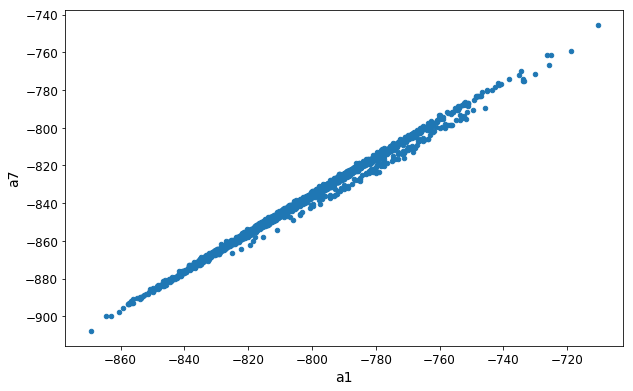

In [82]:
data.plot.scatter("a1", "a7")

In [ ]:
rerun7.plot()

In [ ]:
rerun7.query("Temp == 335").plot.hexbin("AMH", "AMH-Go", cmap="seismic", sharex=False)

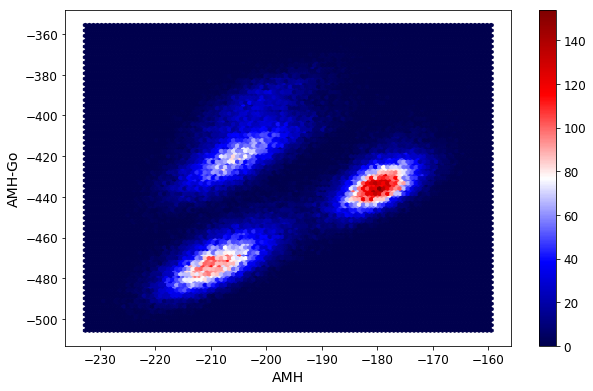

In [65]:
rerun7.query("Temp == 335").plot.hexbin("AMH", "AMH-Go", cmap="seismic", sharex=False)

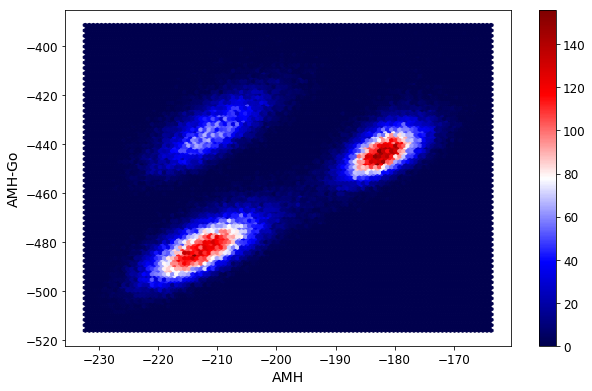

In [55]:
rerun7.query("Temp == 300").plot.hexbin("AMH", "AMH-Go", cmap="seismic", sharex=False)

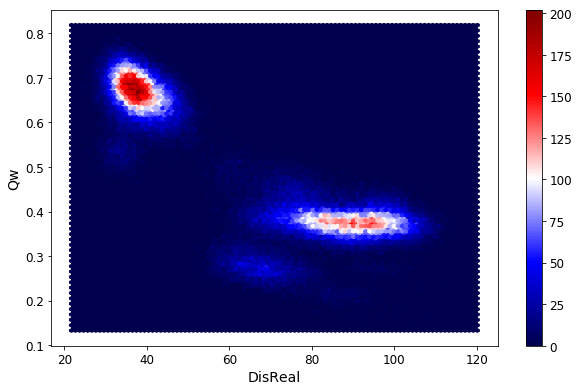

In [14]:
rerun5.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

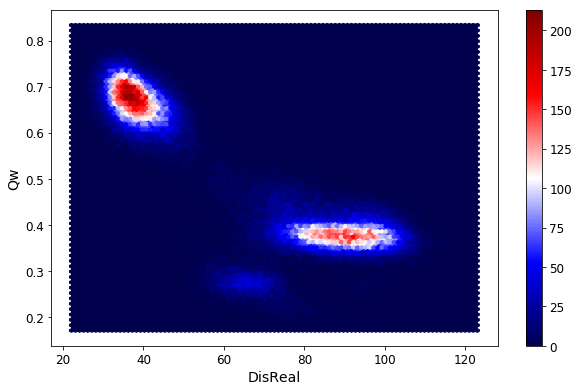

In [17]:
rerun7.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

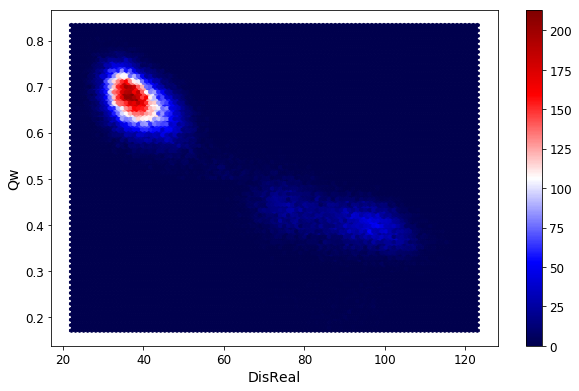

In [20]:
rerun7.query("Temp == 300 and (z_h6 < -10 or Qw > 0.5) ").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [22]:
t= rerun7.query("Temp == 300 and z_h6 < -10")
select(t)

count       mean       std        min        25%         50%  \
BiasTo Run                                                                  
104.0  0     983.0  97.236719  4.697942  75.259632  94.172471   97.209757   
106.0  2    1282.0  98.091455  5.104332  82.959509  94.723268   97.865912   
       3    1218.0  98.455991  5.028545  81.678390  94.947117   98.477324   
108.0  5    2500.0  99.864770  5.167327  78.890574  96.421340  100.038164   
76.0   1    1068.0  73.590042  5.332046  57.548284  70.040507   73.500604   
78.0   11   1995.0  75.570485  4.826693  57.741314  72.381825   75.519168   
80.0   4     856.0  77.191737  5.389062  52.286470  73.649426   77.294699   
       5     174.0  75.664075  4.950528  62.046244  72.363856   74.990368   
92.0   8     440.0  86.975352  5.413682  72.056644  83.288570   86.665362   
       10   1981.0  87.548704  5.110247  68.489670  84.130072   87.597037   
94.0   4     318.0  89.623595  4.361864  76.309859  86.805800   89.648488   
98.0   5     780.0  92.539101  4.512893  78.944036  89.436135   92.545338   

                   75%         max  
BiasTo Run                          
104.0  0    100.218575  111.752813  
106.0  2    101.486439  116.643485  
       3    101.920718  116.512454  
108.0  5    103.274501  122.993387  
76.0   1     77.007137   92.262656  
78.0   11    78.749332   90.481713  
80.0   4     80.734393   94.992811  
       5     78.711984   92.407676  
92.0   8     90.629183  100.869833  
       10    91.068002  104.262747  
94.0   4     92.806816   99.602752  
98.0   5     95.645138  104.433651

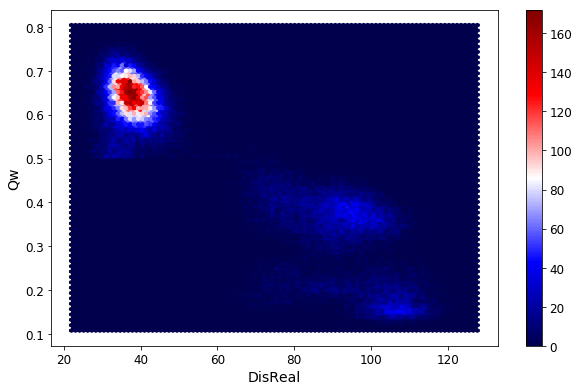

In [23]:
rerun7.query("Temp == 335 and (z_h6 < -10 or Qw > 0.5) ").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [27]:
t= rerun7.query("Temp == 335 and z_h6 < -10 and Qw > 0.25")
select(t)

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
104.0  0    1320.0  98.259947  5.574974  82.832468  94.314557  98.029273   
106.0  2    1136.0  98.691129  5.085558  83.843885  95.169937  98.769920   
       3    1180.0  99.887928  5.467260  80.715249  96.255772  99.749444   
76.0   1    1233.0  74.029935  5.213221  57.210694  70.553128  73.999413   
78.0   4     151.0  77.874687  5.780466  62.840120  73.235049  78.623478   
       11    436.0  75.809566  4.999511  62.653720  72.257411  75.786060   
80.0   4    1216.0  78.185871  5.716180  56.193863  74.244251  78.116129   
92.0   8    1356.0  88.845695  5.583830  67.605961  85.350187  89.168057   
       10    500.0  88.891416  5.177566  71.724760  85.748851  88.962525   
94.0   4    1940.0  90.091752  5.350730  73.388469  86.532945  90.111791   
98.0   5    1684.0  93.593049  5.363018  73.880812  89.981989  93.660790   

                   75%         max  
BiasTo Run                          
104.0  0    102.019173  115.968868  
106.0  2    102.321804  114.406352  
       3    103.354365  117.523148  
76.0   1     77.649048   89.862177  
78.0   4     82.329539   90.858642  
       11    79.233770   89.965252  
80.0   4     82.102672   97.122317  
92.0   8     92.610793  108.057062  
       10    92.448307  111.987214  
94.0   4     93.612033  110.214724  
98.0   5     96.994909  111.659439

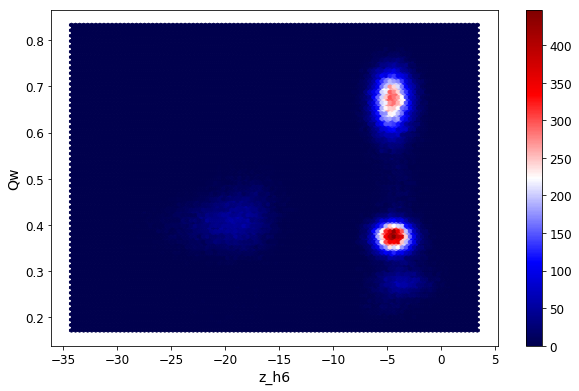

In [18]:
rerun7.query("Temp == 300").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [15]:
rerun5.query("Temp == 300 and z_h6 < -10 and Qw > 0.25").shape

(15424, 44)

In [16]:
rerun7.query("Temp == 300 and z_h6 < -10 and Qw > 0.25").shape

(13638, 44)

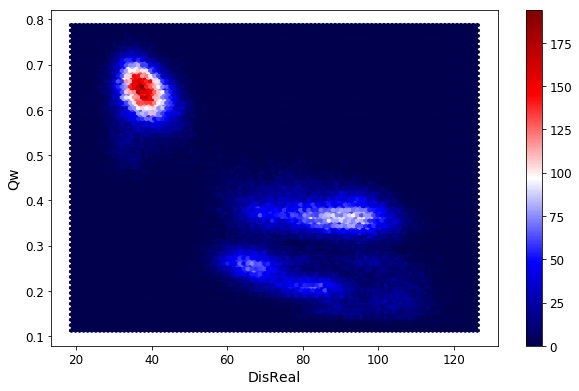

In [4]:
rerun5.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

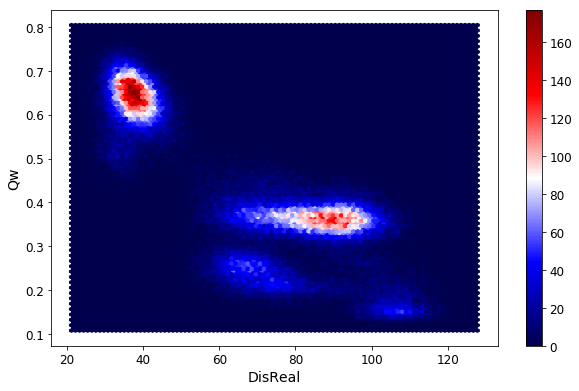

In [5]:
rerun7.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [10]:
rerun5.query("Temp == 335 and z_h6 < -10 and Qw > 0.25").shape

(14546, 44)

In [9]:
rerun7.query("Temp == 335 and z_h6 < -10 and Qw > 0.25").shape

(12426, 44)

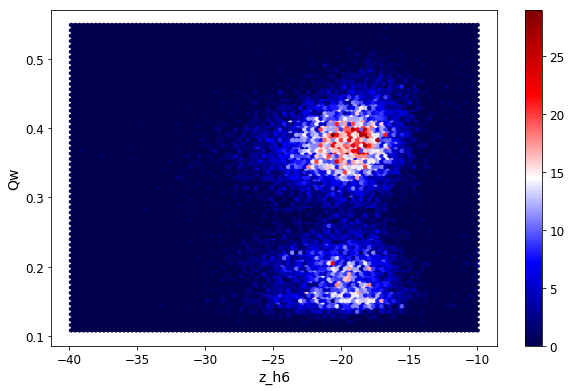

In [12]:
rerun7.query("Temp == 335 and z_h6 < -10").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

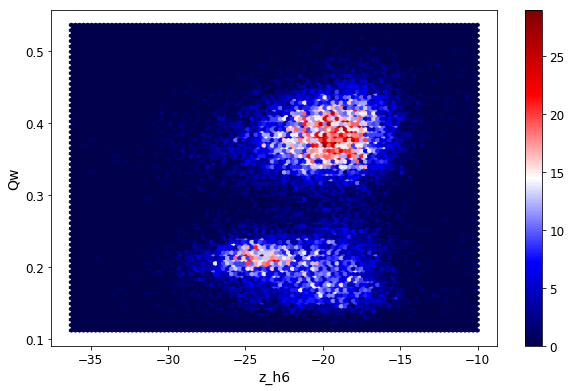

In [13]:
rerun5.query("Temp == 335 and z_h6 < -10").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

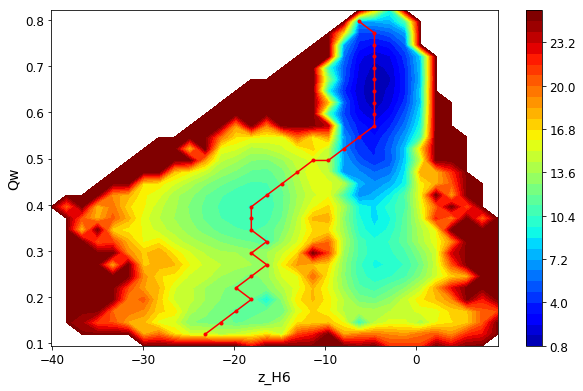

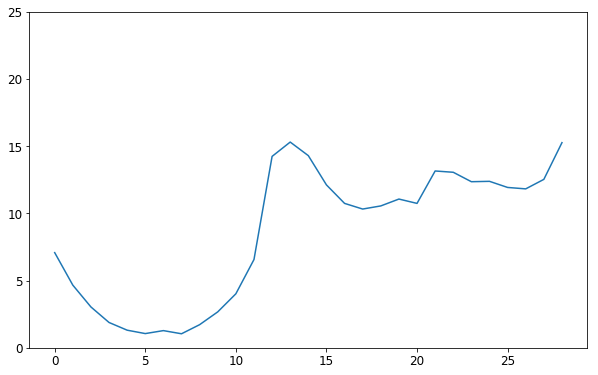

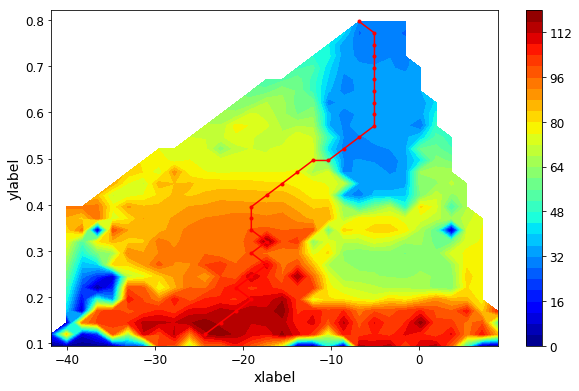

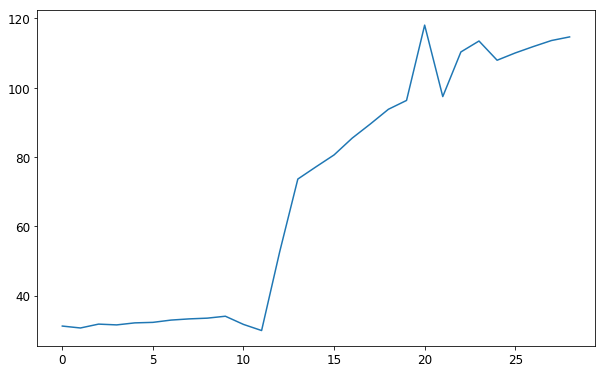

In [50]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 320
location = pre + "/second_combine/_280-350/2d_z_qw/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), end=(28,20),save=False, xlabel="z_H6", ylabel="Qw", zmax=25,res=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

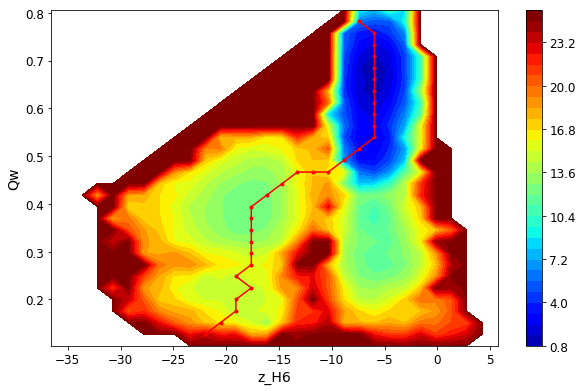

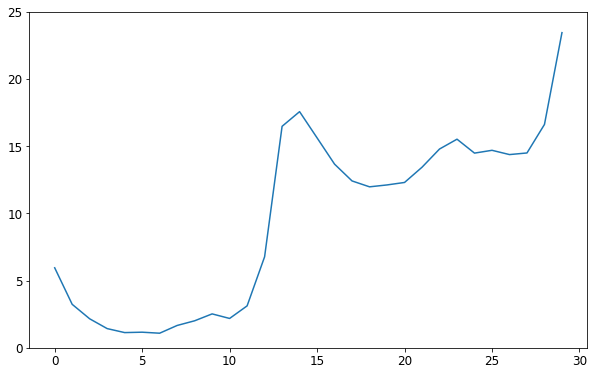

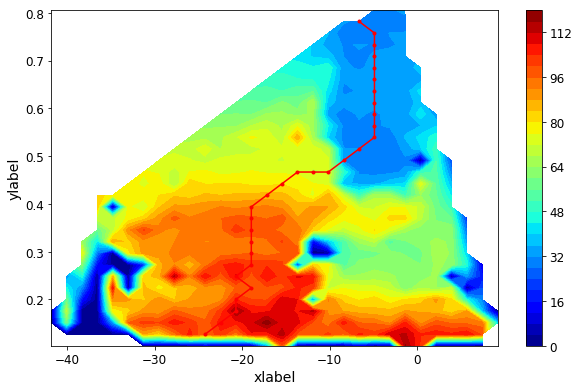

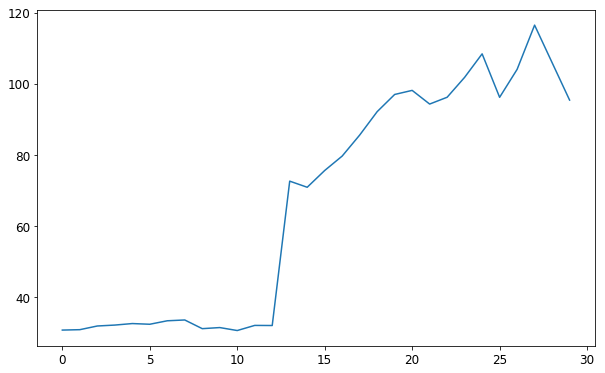

In [40]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 310
location = pre + "/second_rerun2/_280-350/2d_z_qw/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), end=(28,20),save=False, xlabel="z_H6", ylabel="Qw", zmax=25,res=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)